<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/ML_sem7/models/ML04_D17B1_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVR**
UNIVARIATE DATASET

## Importing the libraries

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd

# data = {
#     'X (Feature)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
#     'Y (Target)': [2, 3, 3, 4, 4, 5, 5, 6, 7, 9, 11, 8, 10, 9, 9, 10, 10, 11, 11, 12]
# }

# lr numerical
# data = {
#     'X (Feature)': [-1, 0, 1, 2],
#     'Y (Target)': [0,2,4,5]
# }

# linear svr numerical
data = {
    'X (Feature)': [1, 2, 1, 2, 4, 5, 5, 6],
    'Y (Target)': [1, 1, -1, -1, 0, 1, -1, 0]
}


df = pd.DataFrame(data)

print(df)


   X (Feature)  Y (Target)
0            1           1
1            2           1
2            1          -1
3            2          -1
4            4           0
5            5           1
6            5          -1
7            6           0


## Importing the dataset

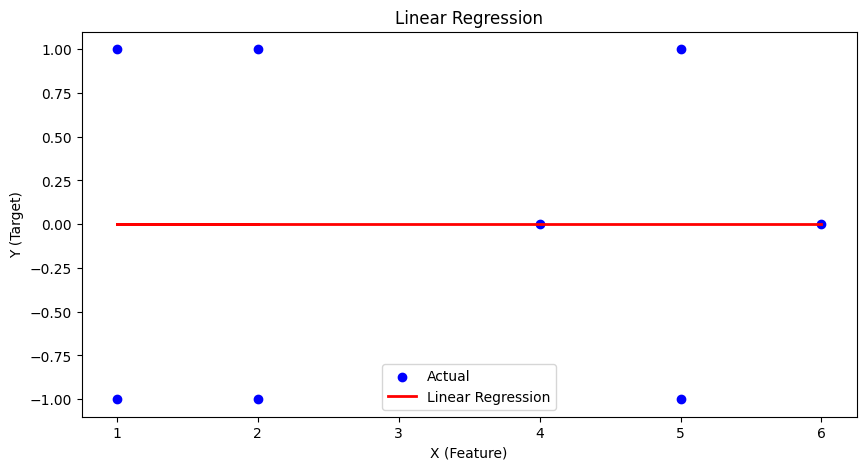

In [ ]:
# Split the dataset into features and target
X = df[['X (Feature)']]
y = df['Y (Target)']

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X, y)
lr_predictions = lr_model.predict(X)

# Visualize the results
plt.figure(figsize=(10, 5))

# Scatter plot of the data points
plt.scatter(X, y, color='blue', label='Actual', marker='o')

# Plot the linear regression line
plt.plot(X, lr_predictions, color='red', linewidth=2, label='Linear Regression')

plt.title('Linear Regression')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.legend()

plt.show()

   X (Feature)
0            1
1            2
2            1
3            2
4            4
5            5
6            5
7            6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


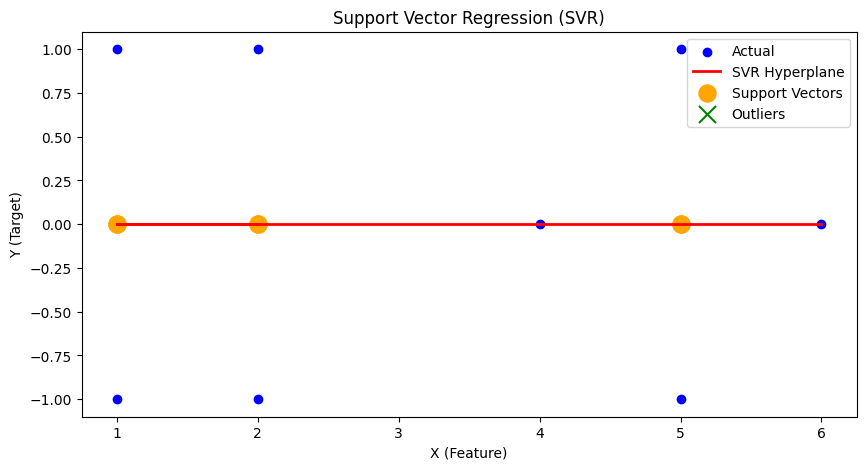

In [ ]:
print(X)# SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X, y)
svr_predictions = svr_model.predict(X)

# Get the support vectors and epsilon (margin) values
support_vectors = svr_model.support_vectors_
epsilon = svr_model.epsilon

# Calculate the hyperplane coefficients
coef = svr_model.coef_
intercept = svr_model.intercept_

# Calculate the margin lines
margin = 1.0  # You can adjust the margin width
margin_upper = svr_predictions + epsilon + margin
margin_lower = svr_predictions - epsilon - margin

# Identify outliers (points outside the margin)
outliers = (y > margin_upper) | (y < margin_lower)

# Visualize the results
plt.figure(figsize=(10, 5))

# Scatter plot of the data points
plt.scatter(X, y, color='blue', label='Actual', marker='o')

# Plot the SVR hyperplane
plt.plot(X, svr_predictions, color='red', linewidth=2, label='SVR Hyperplane')

# Plot the support vectors
plt.scatter(support_vectors, svr_model.predict(support_vectors), color='orange', marker='o', s=150, label='Support Vectors')

# Mark outliers in green
plt.scatter(X[outliers], y[outliers], color='green', marker='x', s=150, label='Outliers')

plt.title('Support Vector Regression (SVR)')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.legend()

plt.show()

In [ ]:
lr_slope = lr_model.coef_[0]
lr_intercept = lr_model.intercept_
lr_line = f"Linear Regression Line: y = {lr_slope:.2f}x + {lr_intercept:.2f}"
print(lr_line)



Linear Regression Line: y = 0.00x + 0.00


# linear vs polynomial svr

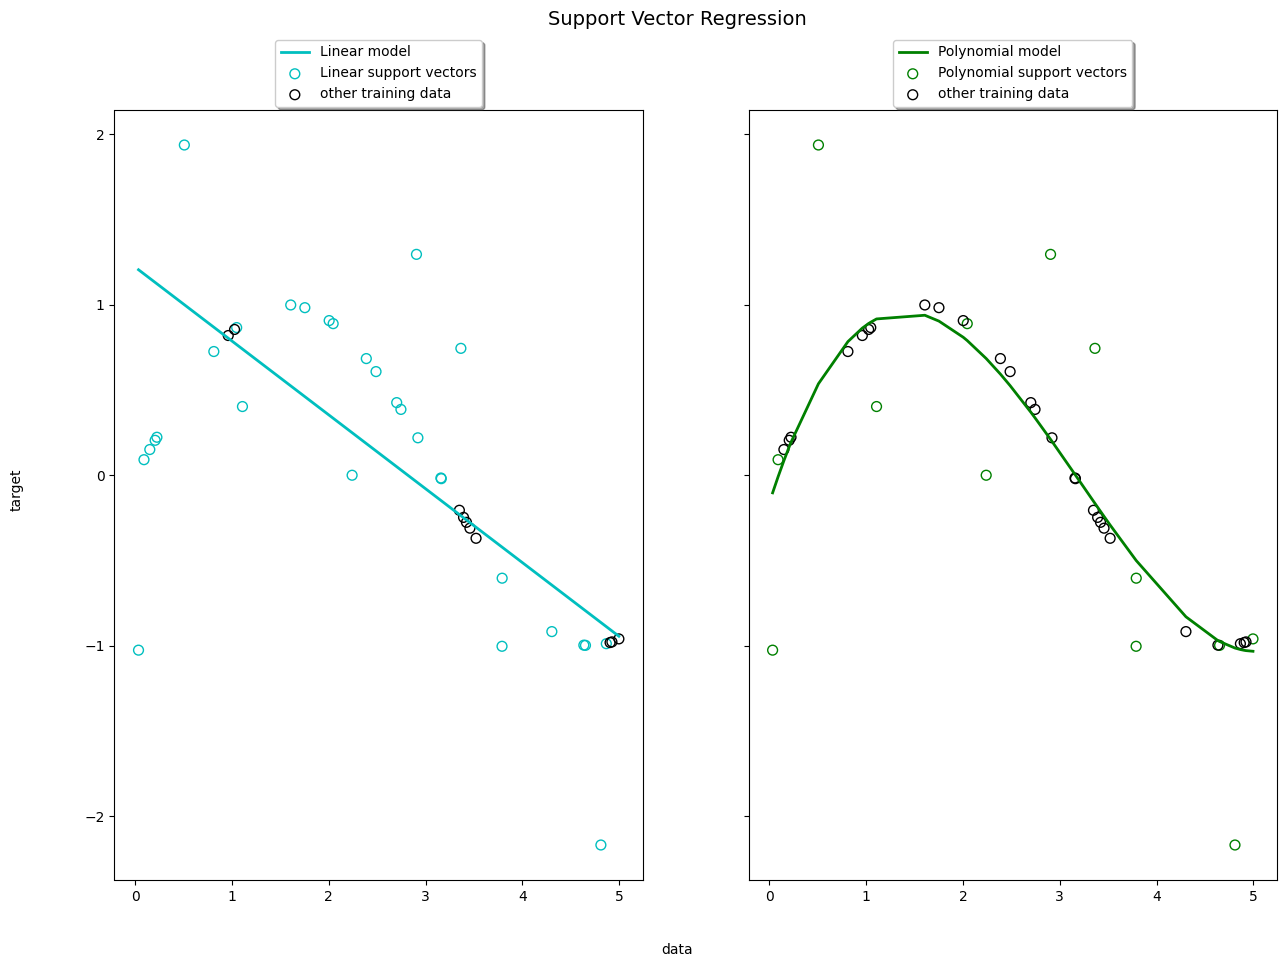

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR


X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)



lw = 2

svrs = [svr_lin, svr_poly]
kernel_label = ["Linear", "Polynomial"]
model_color = ["c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

# svr vs lr

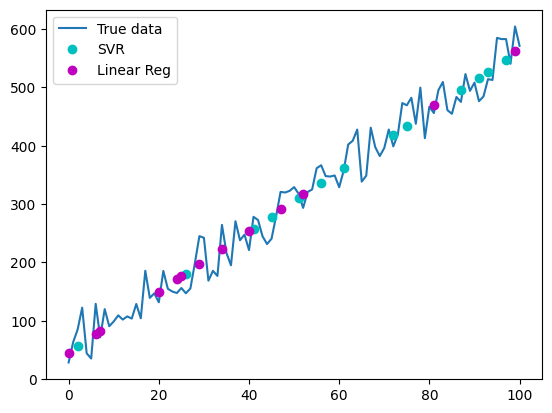

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.linspace(0,100,101)
y = np.array([(100*np.random.rand(1)+num) for num in (5*X+10)])

X_train, X_test, y_train, y_test = train_test_split(X, y)

svr = SVR(kernel='linear')
lm = LinearRegression()
svr.fit(X_train.reshape(-1,1),y_train.flatten())
lm.fit(X_train.reshape(-1,1), y_train.flatten())

pred_SVR = svr.predict(X_test.reshape(-1,1))
pred_lm = lm.predict(X_test.reshape(-1,1))

plt.plot(X,y, label='True data')
plt.plot(X_test[::2], pred_SVR[::2], 'co', label='SVR')
plt.plot(X_test[1::2], pred_lm[1::2], 'mo', label='Linear Reg')
plt.legend(loc='upper left');

## evaluation measures

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate random data
X = np.linspace(0, 100, 101)
y = np.array([(100 * np.random.rand(1) + num) for num in (5 * X + 10)])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVR and Linear Regression models
svr = SVR(kernel='linear')
lm = LinearRegression()

# Fit the models
svr.fit(X_train.reshape(-1, 1), y_train.flatten())
lm.fit(X_train.reshape(-1, 1), y_train.flatten())

# Make predictions on the training data
pred_SVR_train = svr.predict(X_train.reshape(-1, 1))
pred_lm_train = lm.predict(X_train.reshape(-1, 1))

# Calculate RMSE and MAE for SVR on training data
rmse_SVR_train = np.sqrt(mean_squared_error(y_train, pred_SVR_train))
mae_SVR_train = mean_absolute_error(y_train, pred_SVR_train)

# Calculate RMSE and MAE for Linear Regression on training data
rmse_lm_train = np.sqrt(mean_squared_error(y_train, pred_lm_train))
mae_lm_train = mean_absolute_error(y_train, pred_lm_train)

print(f'SVR RMSE on Training Data: {rmse_SVR_train:.2f}')
print(f'SVR MAE on Training Data: {mae_SVR_train:.2f}')
print(f'Linear Regression RMSE on Training Data: {rmse_lm_train:.2f}')
print(f'Linear Regression MAE on Training Data: {mae_lm_train:.2f}')


SVR RMSE on Training Data: 28.27
SVR MAE on Training Data: 23.67
Linear Regression RMSE on Training Data: 27.94
Linear Regression MAE on Training Data: 23.80


# **ASSESSMENT**

**Q1. Write appropriate equation for SVR**


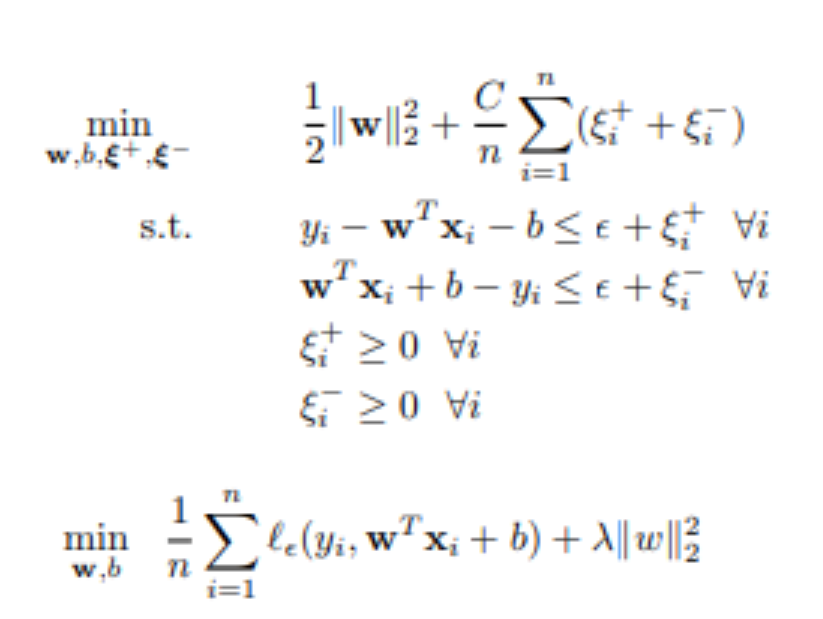

In this equation:

w represents the weight vector.

b is the bias term.

ξ & ξ* are slack variables that allow some points to be on the wrong side of the margin or hyperplane but penalize them for doing so.


C is a hyperparameter that controls the trade-off between maximizing the margin and minimizing the error. It is a regularization parameter, and larger values of C correspond to less tolerance for errors.

ϵ is a hyperparameter that defines the width of the epsilon-insensitive tube. Data points within this tube do not contribute to the error.
The goal of SVR is to find the values of w and b that minimize the objective function while satisfying the constraints.



---
**Q2. Is it a maximum margin classifier, justify**

No, Support Vector Regression (SVR) is not a maximum margin classifier. It is a regression technique used for predicting continuous numerical values, and its objective is to minimize the error between predicted and actual values while maintaining a specified margin of tolerance (epsilon-insensitive tube).

---
**Q3. What is the difference between SVR and SVM.**

Certainly, here's a tabular comparison between Support Vector Machines (SVM) and Support Vector Regression (SVR):

| Aspect                              | Support Vector Machines (SVM)               | Support Vector Regression (SVR)            |
|-------------------------------------|--------------------------------------------|--------------------------------------------|
| Purpose                             | Classification tasks                      | Regression tasks                           |
| Output                              | Class labels                               | Continuous numerical values                |
| Loss Function                        | Hinge loss or variants for classification | Loss function for regression within an epsilon-insensitive tube |
| Application                         | Image classification, text categorization, spam detection, etc. | Stock price prediction, disease outcome forecasting, time-series forecasting, etc. |
| Output Interpretation                | Class label (e.g., "Yes" or "No")         | Numerical prediction (e.g., temperature, stock price) |
| Objective                            | Maximize margin between classes           | Minimize error within a specified margin   |
| Decision Boundary                   | Hyperplane separating classes             | Regression function fitting data points    |
| Supervised Learning Algorithm       | Yes                                      | Yes                                      |

This table summarizes the key differences between SVM and SVR in terms of their objectives, outputs, loss functions, applications, and more.


---

**Q4. What is the significance of ε and 𝜁**

In Support Vector Regression (SVR), ε (epsilon) and ξ (xi) are important parameters that play a significant role in shaping the SVR model's behavior and determining the trade-off between fitting the data and controlling the margin of error. These parameters are crucial for fine-tuning the SVR model's performance for specific applications.

1. **ε (Epsilon)**:
   - Epsilon, denoted as ε, defines the width of the epsilon-insensitive tube around the regression line. This tube represents a region where errors (deviations from the actual target values) are not penalized. Data points within this tube do not contribute to the loss function.
   - ε defines the tolerance for errors in SVR, allowing for some deviations from the regression line without penalty,
   - Points outside the tube are penalized linearly based on how far they deviate from the tube boundaries. The greater the deviation, the larger the penalty.
   - Adjusting the value of ε allows you to control the tolerance for errors in the model. Smaller values of ε result in a smaller insensitive tube and a stricter fit, while larger values of ε allow for more errors within the tube.

2. **ξ (Xi)**:
   - ξ (xi) represents slack variables in the SVR optimization problem. These slack variables allow some data points to be on the wrong side of the margin or hyperplane, but they are penalized for doing so.
   - In the SVR objective function, ξ and ξ* (dual variables) are introduced for each data point in the training set. ξ represents the distance of a data point below the lower margin boundary, while ξ* represents the distance above the upper margin boundary.
   - ξ and ξ* help in handling data points that cannot be fitted within the epsilon-insensitive tube due to noise or outliers. By introducing these slack variables, SVR finds a balance between fitting the data closely and maintaining a margin of error.
   - The regularization parameter C in SVR controls the trade-off between minimizing ξ and maximizing the margin. Larger values of C penalize ξ more heavily, leading to a smaller margin but potentially better fitting to the training data.
   - ξ and C control the balance between fitting the data closely and maintaining a margin of error, helping the SVR model generalize well to new data while handling outliers and noise in the training set.

---
**Q5. State two applications of SVR**


1. **Financial Forecasting**: SVR is often used in finance for tasks such as stock price prediction, commodity price forecasting, and exchange rate prediction. Financial data is typically noisy and exhibits non-linear patterns, making it suitable for SVR. SVR can capture complex dependencies between various financial indicators and provide accurate forecasts, which is crucial for making informed investment decisions.

2. **Medical Outcome Prediction**: SVR can be applied in the field of healthcare for tasks like disease progression modeling, patient outcome prediction, and medical image analysis. SVR can handle high-dimensional data and non-linear relationships between medical features, allowing it to make predictions based on patient data, genetic information, and other relevant factors. For example, SVR can be used to predict the progression of diseases like Alzheimer's or to forecast patient survival rates based on clinical data.

---